<a href="https://colab.research.google.com/github/Janv-iiii/AI-dream-visualizer/blob/main/AI_powered_dream_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mne numpy scipy matplotlib pandas tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 88.7 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')  # Access files from Google Drive


Mounted at /content/drive


In [3]:
!git clone https://github.com/Seba3995/EEG_web_app.git

Cloning into 'EEG_web_app'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 51 (delta 20), reused 43 (delta 16), pack-reused 0 (from 0)
Receiving objects: 100% (51/51), 306.83 KiB | 9.02 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [4]:
%%writefile requirements.txt
streamlit==1.31
mne==1.9
numpy>=1.18.1
tensorflow>=2.16
plotly>=5.18



Writing requirements.txt


In [5]:
!python --version


Python 3.11.11


In [6]:
!pip install -r requirements.txt



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 97.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
  Attempting uninstall: protobuf
    Found existing ins

In [1]:
!pip install streamlit==1.31
!pip install mne==1.9
!pip install numpy>=1.18.1
!pip install tensorflow>=2.16
!pip install plotly>=5.18


In [2]:
import streamlit
import mne
import numpy
import tensorflow as tf
import plotly

print("All libraries installed successfully!")


All libraries installed successfully!


In [3]:
# Create project directories
!mkdir -p dream_visualizer/utils
!mkdir -p dream_visualizer/assets

# Create placeholder files
!touch dream_visualizer/app.py
!touch dream_visualizer/requirements.txt
!touch dream_visualizer/utils/preprocess.py
!touch dream_visualizer/utils/model_loader.py
!touch dream_visualizer/utils/viz.py


In [4]:
%%writefile dream_visualizer/app.py
import streamlit as st
from utils import preprocess, model_loader, viz

st.set_page_config(page_title="Dream Visualizer", layout="wide")

# Sidebar Controls
with st.sidebar:
    st.header("EEG Input")
    eeg_file = st.file_uploader("Upload EEG (.edf)", type=["edf"])
    process_btn = st.button("Generate Dream Visualization")

# Main Display
if eeg_file and process_btn:
    with st.spinner("Processing EEG..."):
        # 1. Preprocessing
        raw = preprocess.load_eeg(eeg_file)
        features = preprocess.extract_features(raw)

        # 2. Model Prediction
        dream_class = model_loader.predict(features)

        # 3. Image Generation
        generated_image = model_loader.generate_image(dream_class)

        # Display Results
        col1, col2 = st.columns(2)
        with col1:
            viz.plot_topomap(raw)
        with col2:
            st.image(generated_image, caption="Generated Dream Visualization")


Overwriting dream_visualizer/app.py


In [5]:
!pip install streamlit mne numpy tensorflow plotly pyngrok


In [64]:
!ngrok authtoken 2uh2VQGd3grqPhTcnW5O4LYazg2_7fMBSvheZdnkAqCSh5JE2


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [65]:
!pip install pyngrok --upgrade


In [66]:
from pyngrok import ngrok

# Set your ngrok authtoken (replace YOUR_AUTHTOKEN with your actual token)
ngrok.set_auth_token("2uh2VQGd3grqPhTcnW5O4LYazg2_7fMBSvheZdnkAqCSh5JE2")

# Start the tunnel on port 8501 (default Streamlit port)
public_url = ngrok.connect(8501)
print(f"Ngrok tunnel started! Public URL: {public_url}")


Ngrok tunnel started! Public URL: NgrokTunnel: "https://9d01-35-245-61-73.ngrok-free.app" -> "http://localhost:8501"


In [67]:
!ngrok authtoken 2uh2VQGd3grqPhTcnW5O4LYazg2_7fMBSvheZdnkAqCSh5JE2


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [68]:
!streamlit run dream_visualizer/app.py --server.port 8501 > /dev/null 2>&1 &


In [69]:
from pyngrok import ngrok

public_url = ngrok.connect(8501)
print(f"Access your Streamlit app at: {public_url}")


Access your Streamlit app at: NgrokTunnel: "https://07b2-35-245-61-73.ngrok-free.app" -> "http://localhost:8501"


In [12]:
import mne

# Load EEG data
raw = mne.io.read_raw_edf('sample.edf', preload=True)
raw.filter(0.5, 45)  # Bandpass filter

# Plot raw signals
raw.plot(n_channels=10, duration=5)


Extracting EDF parameters from /content/sample.edf...
EDF file detected


FileNotFoundError: [Errno 2] No such file or directory: '/content/sample.edf'

In [13]:
!ls /content


'=1.18.1'  '=5.18'	       drive	     requirements.txt
'=2.16'     dream_visualizer   EEG_web_app   sample_data


In [14]:
!ls /content


'=1.18.1'  '=5.18'	       drive	     requirements.txt
'=2.16'     dream_visualizer   EEG_web_app   sample_data


In [15]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload a file


KeyboardInterrupt: 

In [16]:
!ls /content


'=1.18.1'  '=5.18'	       drive	     requirements.txt
'=2.16'     dream_visualizer   EEG_web_app   sample_data


Extracting EDF parameters from /content/test_generator.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 179999  =      0.000 ...   899.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1321 samples (6.605 s)



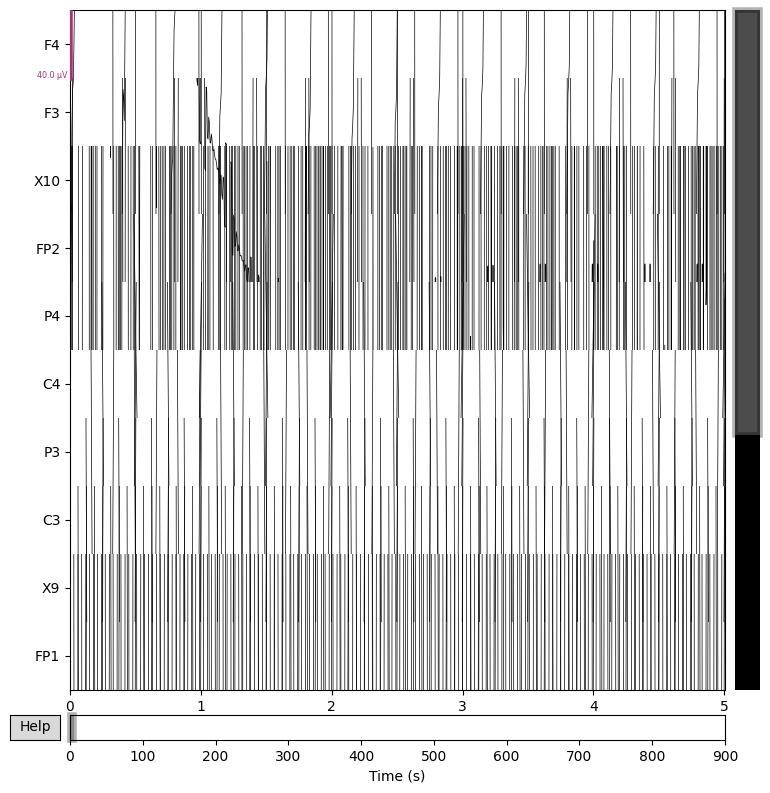

ValueError: bad channel(s) ['Fp1', 'Fp2'] marked do not exist in info

In [29]:
import mne

# Load the EEG data
raw = mne.io.read_raw_edf('/content/test_generator.edf', preload=True)


# Apply bandpass filter (0.5 - 45 Hz)
raw.filter(0.5, 45, fir_design='firwin')

# Plot the raw data to visualize
raw.plot(n_channels=10, duration=5)

# Remove bad channels if needed (you can specify them based on visual inspection)
raw.info['bads'] = ['Fp1', 'Fp2']  # Example bad channels
raw.interpolate_bads()  # Interpolate bad channels

# Epoch the data if necessary (e.g., for specific events)
events = mne.find_events(raw)  # Find events in the data
epochs = mne.Epochs(raw, events, event_id=None, tmin=0, tmax=2, baseline=None)


In [30]:
print(raw.ch_names)


['F4', 'F3', 'X10', 'FP2', 'P4', 'C4', 'P3', 'C3', 'X9', 'FP1', 'F8', 'F7', 'DC01', 'DC04', 'DC03', 'DC02']


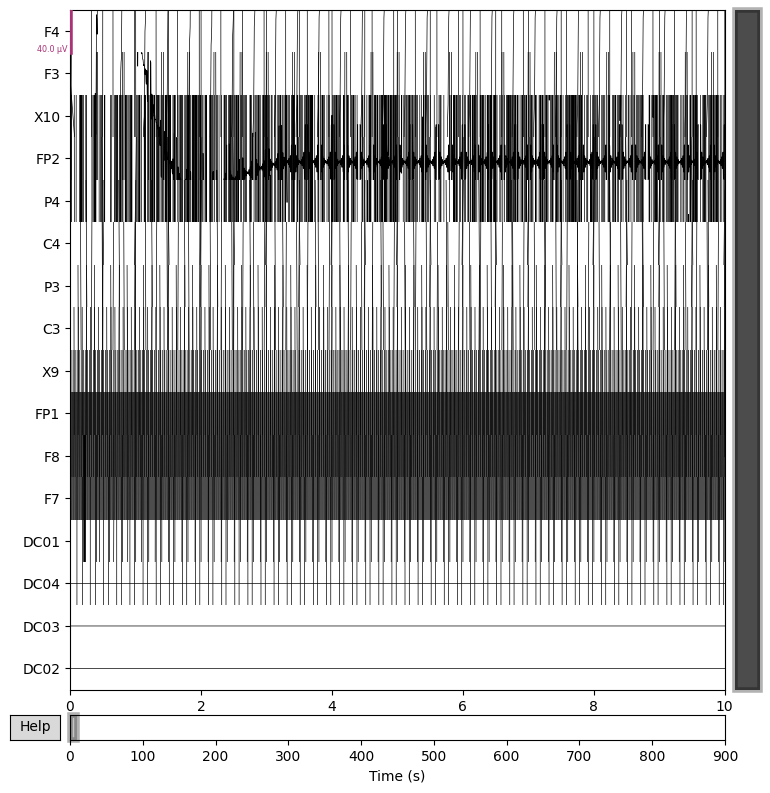

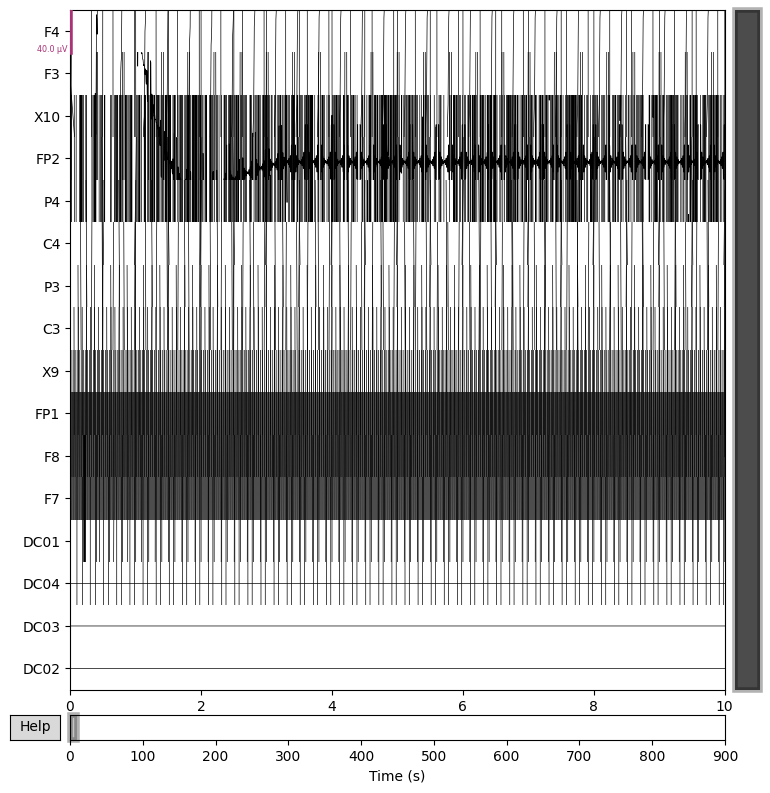

In [31]:
raw.plot(n_channels=len(raw.ch_names), duration=10)  # Plot all channels for inspection


In [32]:
# Mark bad channels based on visual inspection
raw.info['bads'] = ['FP2', 'FP1']  # Replace with actual bad channel names


In [36]:
import mne

# Load the EEG data
raw = mne.io.read_raw_edf('test_generator.edf', preload=True)

# Mark bad channels based on inspection
raw.info['bads'] = ['FP2', 'FP1']  # Replace with actual bad channel names

# Interpolate using nearest neighbor method (no digitization required)
raw.interpolate_bads(method='nearest')

# Apply bandpass filter (0.5 - 45 Hz)
raw.filter(0.5, 45, fir_design='firwin')

# Continue with feature extraction or analysis...



Extracting EDF parameters from /content/test_generator.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 179999  =      0.000 ...   899.995 secs...


ValueError: Invalid value for the 'method['eeg']' parameter. Allowed values are 'spline', 'MNE', and 'nan', but got 'nearest' instead.

In [26]:
import os

base_path = "/content/drive/MyDrive/files/S001"  # Adjust this to your dataset's location
print(os.listdir(base_path))  # List all files in the directory


['S001R04.edf', 'S001R03.edf', 'S001R02.edf', 'S001R01.edf', 'S001R06.edf.event', 'S001R03.edf.event', 'S001R01.edf.event', 'S001R02.edf.event', 'S001R09.edf', 'S001R05.edf.event', 'S001R08.edf', 'S001R07.edf', 'S001R06.edf', 'S001R05.edf', 'S001R14.edf', 'S001R13.edf', 'S001R12.edf', 'S001R10.edf.event', 'S001R13.edf.event', 'S001R11.edf.event', 'S001R08.edf.event', 'S001R14.edf.event', 'S001R12.edf.event', 'S001R09.edf.event', 'S001R11.edf', 'S001R07.edf.event', 'S001R10.edf', 'S001R04.edf.event']


Mounted at /content/drive
Extracting EDF parameters from /content/drive/MyDrive/files/S001/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Loaded S001R01.edf
Using matplotlib as 2D backend.


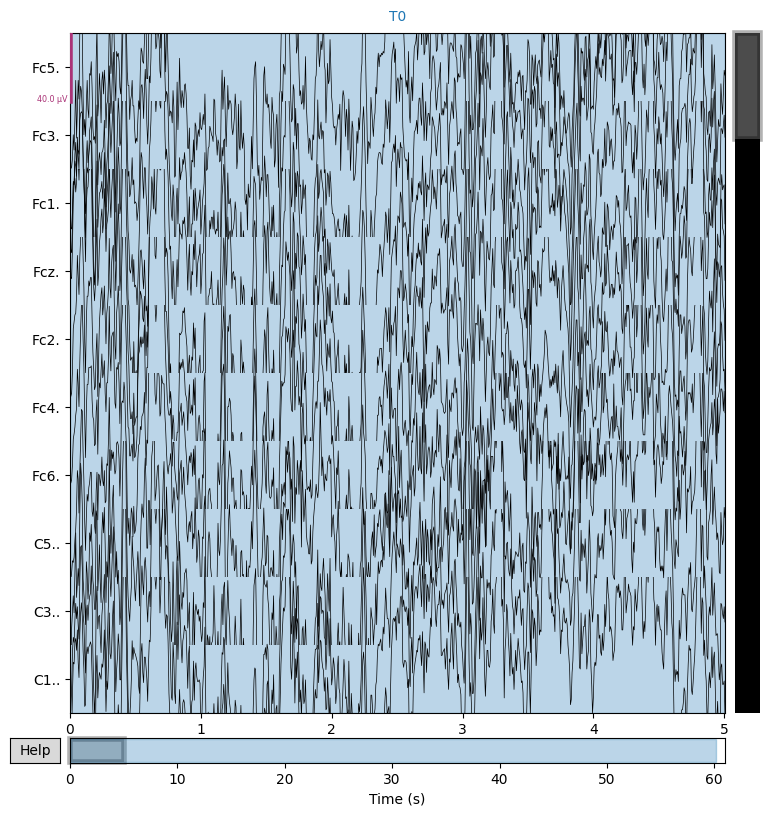

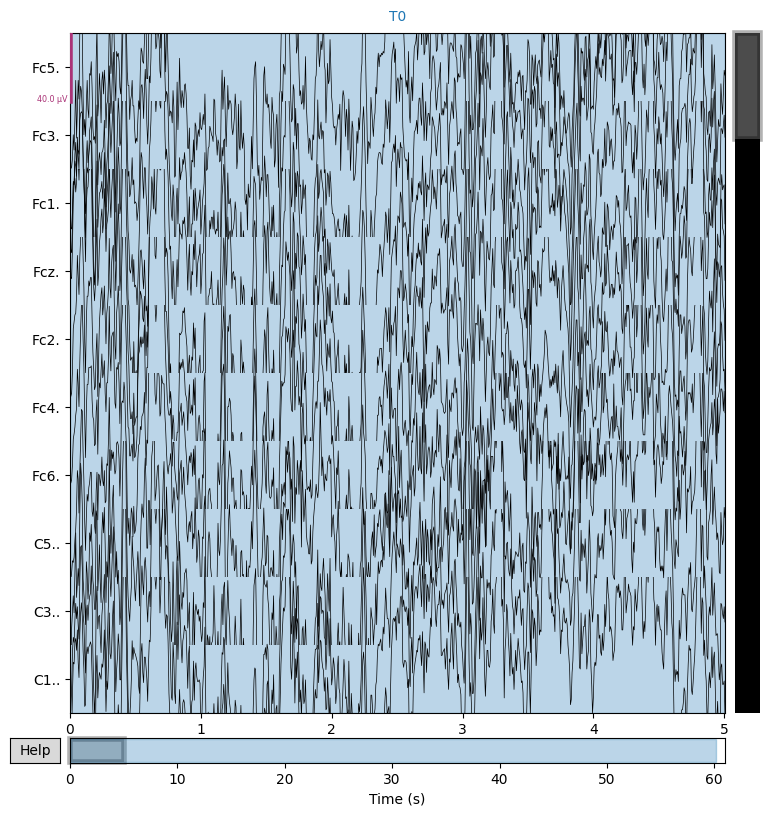

In [27]:
import mne
import os

# Mount Google Drive (if not already mounted)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Set the base path to your dataset
base_path = "/content/drive/MyDrive/files/S001"

# Specify the EDF file you want to load
edf_file = "S001R01.edf"  # Change this to any other file if needed
file_path = os.path.join(base_path, edf_file)

# Load the EEG data
raw = mne.io.read_raw_edf(file_path, preload=True)
print(f"Loaded {edf_file}")

# Plot raw data for inspection
raw.plot(n_channels=10, duration=5)


In [28]:
# Apply bandpass filter (0.5 - 45 Hz) to remove noise
raw.filter(0.5, 45, fir_design='firwin')

# Mark bad channels based on visual inspection (if needed)
raw.info['bads'] = []  # Add any bad channel names if identified

# Interpolate bad channels (if digitization points are available)
raw.interpolate_bads(method='spline')

# Find events in the data (if available)
events = mne.find_events(raw)

# Create epochs based on events (if applicable)
epochs = mne.Epochs(raw, events, event_id=None, tmin=0, tmax=2, baseline=None)

# Visualize epochs to inspect them
epochs.plot(n_epochs=10, n_channels=10)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1057 samples (6.606 s)

Setting channel interpolation method to {'eeg': 'spline'}.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
<ipython-input-28-252574d7e2b4>:8: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  raw.interpolate_bads(method='spline')


ValueError: No stim channels found, but the raw object has annotations. Consider using mne.events_from_annotations to convert these to events.

In [31]:
# Only call this if you have marked bad channels
if len(raw.info['bads']) > 0:
    raw.interpolate_bads(method='spline')


In [30]:
# Extract events from annotations
events, event_id = mne.events_from_annotations(raw)

# Print extracted events and their mapping
print("Events:", events)
print("Event ID mapping:", event_id)

# Create epochs based on extracted events
epochs = mne.Epochs(raw, events, event_id=event_id, tmin=-0.2, tmax=0.8, baseline=(None, 0), preload=True)

# Plot epochs for inspection
epochs.plot(n_epochs=10, n_channels=10)


Used Annotations descriptions: ['T0']
Events: [[0 0 1]]
Event ID mapping: {'T0': 1}
Not setting metadata
1 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 161 original time points ...
1 bad epochs dropped


<ipython-input-30-1a61eead99d9>:9: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epochs = mne.Epochs(raw, events, event_id=event_id, tmin=-0.2, tmax=0.8, baseline=(None, 0), preload=True)


RuntimeError: epochs.plot() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.

In [32]:
print(epochs.drop_log)



(('NO_DATA',),)


In [33]:
# Create epochs with relaxed rejection criteria
epochs = mne.Epochs(raw, events, event_id=event_id, tmin=-0.2, tmax=0.8,
                    baseline=(None, 0), preload=True, reject=None)


Not setting metadata
1 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 161 original time points ...
1 bad epochs dropped


<ipython-input-33-5a8a4fdafbd7>:2: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epochs = mne.Epochs(raw, events, event_id=event_id, tmin=-0.2, tmax=0.8,


In [34]:
print("Bad channels:", raw.info['bads'])


Bad channels: []


/usr/local/lib/python3.11/dist-packages/mne/viz/misc.py:894: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlabel=xlabel, ylabel="Event id", xlim=[0, max_x])


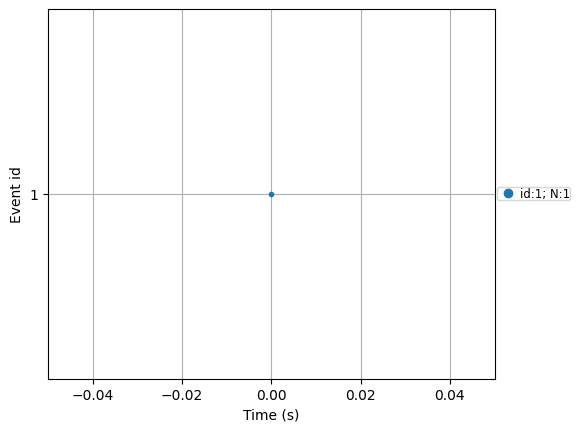

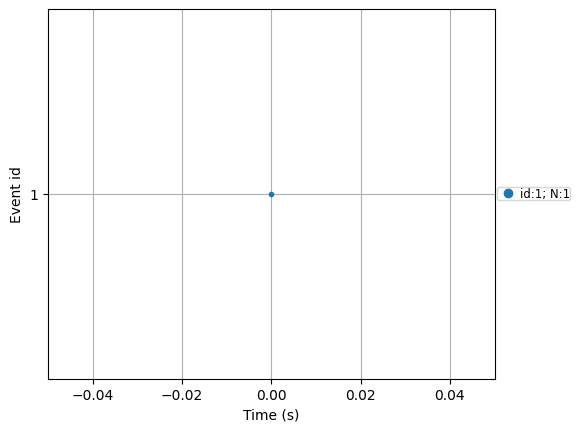

In [35]:
mne.viz.plot_events(events, sfreq=raw.info['sfreq'])


In [36]:
import mne

# Load raw data
file_path = "/content/drive/MyDrive/files/S001/S001R01.edf"
raw = mne.io.read_raw_edf(file_path, preload=True)

# Apply bandpass filter (0.5 - 45 Hz)
raw.filter(0.5, 45, fir_design='firwin')

# Extract events from annotations
events, event_id = mne.events_from_annotations(raw)
print("Events:", events)
print("Event ID mapping:", event_id)

# Check for bad channels
print("Bad channels:", raw.info['bads'])

# Create epochs with relaxed rejection criteria (set reject=None)
epochs = mne.Epochs(raw, events, event_id=event_id, tmin=-0.2, tmax=0.8,
                    baseline=(None, 0), preload=True, reject=None)

# Check drop log to see if any epochs were dropped
print(epochs.drop_log)

# Plot epochs for inspection if any exist
if len(epochs) > 0:
    epochs.plot(n_epochs=10, n_channels=10)
else:
    print("No epochs available for plotting.")


Extracting EDF parameters from /content/drive/MyDrive/files/S001/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1057 samples (6.606 s)

Used Annotations descriptions: ['T0']
Events: [[0 0 1]]
Event ID mapping: {'T0': 1}
Bad channels: []
Not setting metadata
1 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
<ipython-input-36-0d9807366715>:19: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epochs = mne.Epochs(raw, events, event_id=event_id, tmin=-0.2, tmax=0.8,


In [37]:
# Print the events to verify their timing and type
print("Events:", events)


Events: [[0 0 1]]


In [38]:
print(epochs.drop_log)


(('NO_DATA',),)


In [39]:
# Create epochs with relaxed rejection criteria
epochs = mne.Epochs(raw, events, event_id=event_id, tmin=-0.2, tmax=0.8,
                    baseline=(None, 0), preload=True, reject=None)


Not setting metadata
1 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 161 original time points ...
1 bad epochs dropped


<ipython-input-39-5a8a4fdafbd7>:2: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epochs = mne.Epochs(raw, events, event_id=event_id, tmin=-0.2, tmax=0.8,


In [40]:
print("Bad channels:", raw.info['bads'])


Bad channels: []


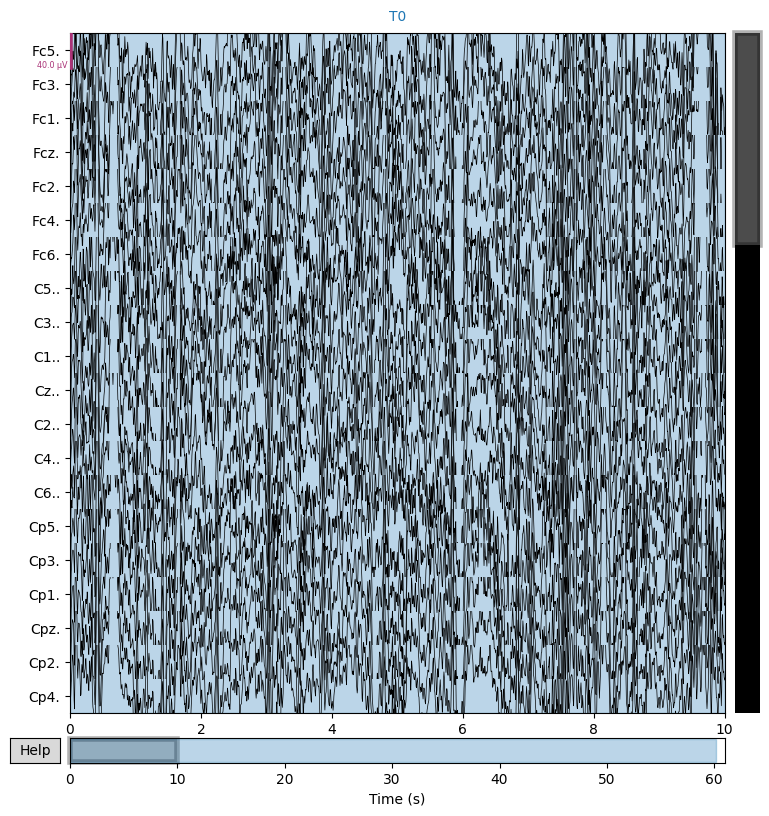

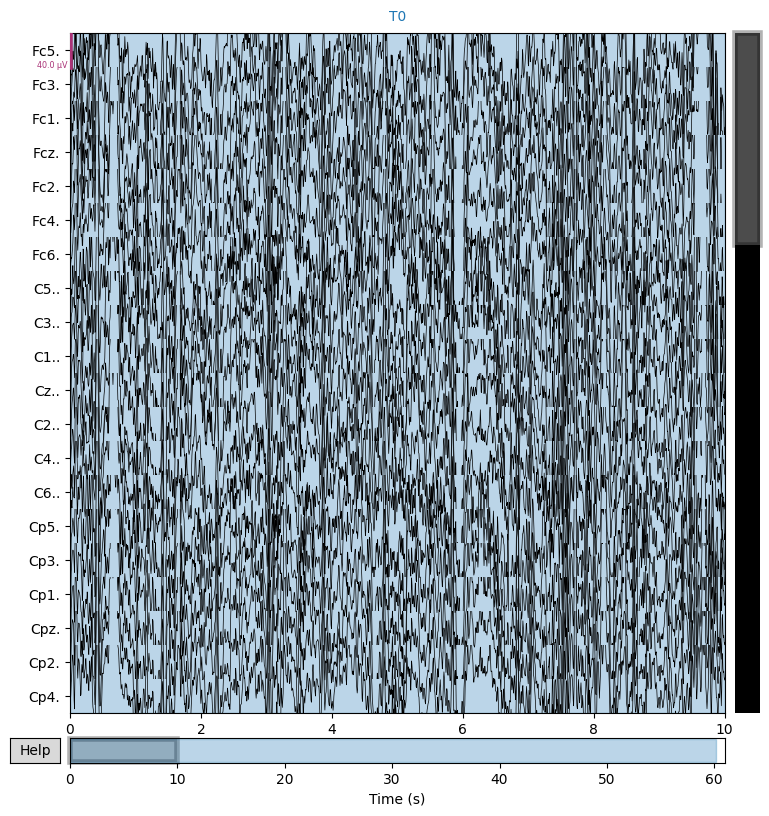

In [41]:
# Plot a segment of raw data around an event time
raw.plot(start=0, duration=10)  # Adjust start and duration as needed


In [42]:
import mne

# Load raw data
file_path = "/content/drive/MyDrive/files/S001/S001R01.edf"
raw = mne.io.read_raw_edf(file_path, preload=True)

# Apply bandpass filter (0.5 - 45 Hz)
raw.filter(0.5, 45, fir_design='firwin')

# Extract events from annotations
events, event_id = mne.events_from_annotations(raw)
print("Events:", events)
print("Event ID mapping:", event_id)

# Check for bad channels
print("Bad channels:", raw.info['bads'])

# Create epochs with relaxed rejection criteria (set reject=None)
epochs = mne.Epochs(raw, events, event_id=event_id, tmin=-0.2, tmax=0.8,
                    baseline=(None, 0), preload=True, reject=None)

# Check drop log to see if any epochs were dropped
print(epochs.drop_log)

# Plot epochs for inspection if any exist
if len(epochs) > 0:
    epochs.plot(n_epochs=10, n_channels=10)
else:
    print("No epochs available for plotting.")


Extracting EDF parameters from /content/drive/MyDrive/files/S001/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1057 samples (6.606 s)

Used Annotations descriptions: ['T0']
Events: [[0 0 1]]
Event ID mapping: {'T0': 1}
Bad channels: []
Not setting metadata
1 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
<ipython-input-42-0d9807366715>:19: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epochs = mne.Epochs(raw, events, event_id=event_id, tmin=-0.2, tmax=0.8,


/usr/local/lib/python3.11/dist-packages/mne/viz/misc.py:894: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlabel=xlabel, ylabel="Event id", xlim=[0, max_x])


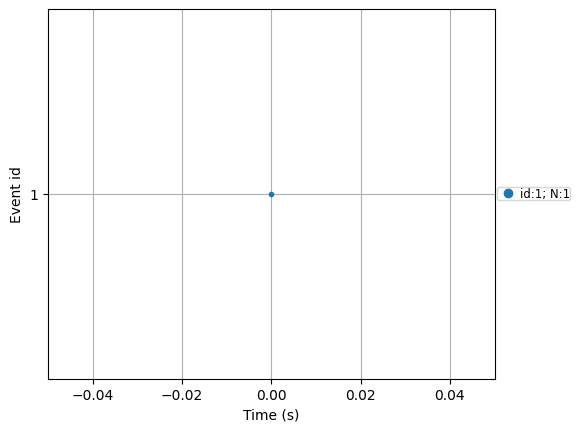

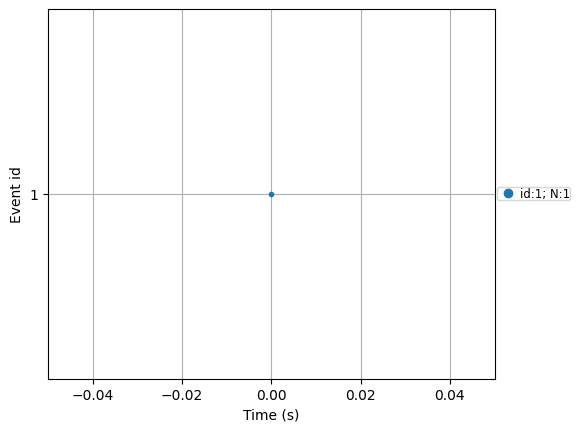

In [43]:
import matplotlib.pyplot as plt

# Plot events to visualize their timing
mne.viz.plot_events(events, sfreq=raw.info['sfreq'])


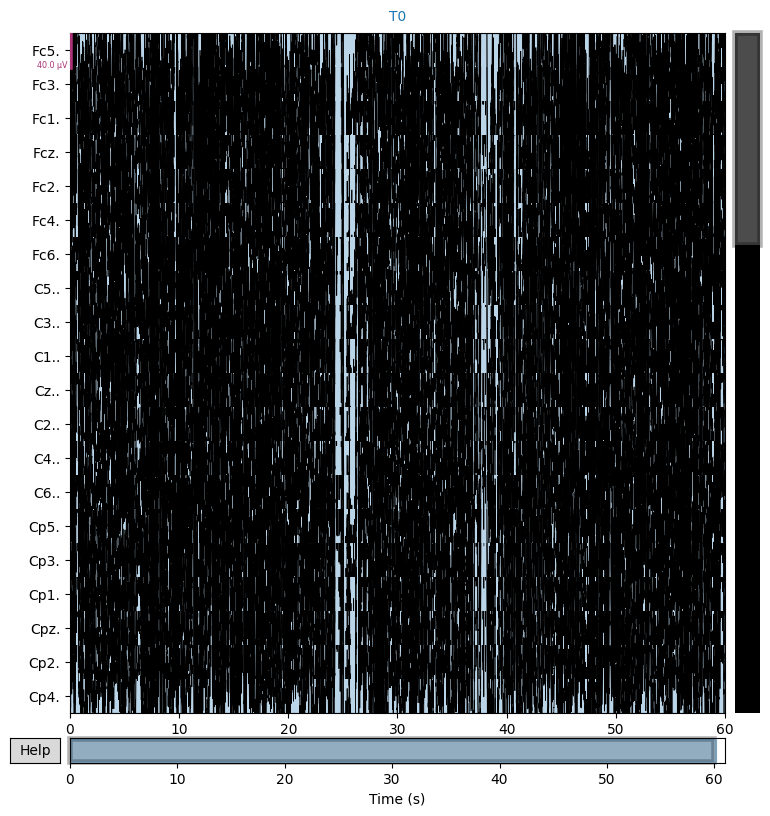

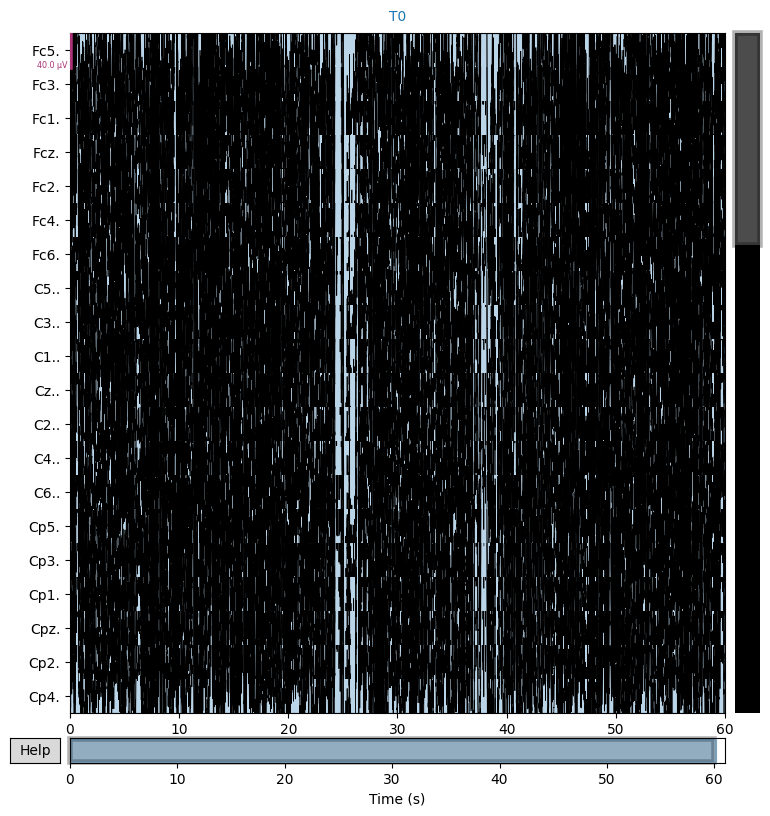

In [44]:
# Plot a segment of raw data around the event time
raw.plot(start=0, duration=60)  # Adjust start and duration as needed


In [45]:
# Create epochs with relaxed rejection criteria
epochs = mne.Epochs(raw, events, event_id=event_id, tmin=-0.2, tmax=0.8,
                    baseline=(None, 0), preload=True, reject=None)


Not setting metadata
1 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 161 original time points ...
1 bad epochs dropped


<ipython-input-45-5a8a4fdafbd7>:2: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epochs = mne.Epochs(raw, events, event_id=event_id, tmin=-0.2, tmax=0.8,


In [46]:
print(epochs.drop_log)


(('NO_DATA',),)


In [47]:
print("Bad channels:", raw.info['bads'])


Bad channels: []


In [48]:
# Attempt creating epochs again after adjustments
epochs = mne.Epochs(raw, events, event_id=event_id, tmin=-0.1, tmax=0.8,
                    baseline=(None, 0), preload=True, reject=None)

# Check if any epochs were created
if len(epochs) > 0:
    print(f"Number of epochs created: {len(epochs)}")
    # Plot epochs for inspection
    epochs.plot(n_epochs=10, n_channels=10)
else:
    print("No epochs available for plotting.")


Not setting metadata
1 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 145 original time points ...
1 bad epochs dropped
No epochs available for plotting.


<ipython-input-48-66eb91208911>:2: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epochs = mne.Epochs(raw, events, event_id=event_id, tmin=-0.1, tmax=0.8,


In [49]:
# Print events to verify their timing and type
print("Events:", events)


Events: [[0 0 1]]


In [51]:
epochs = mne.Epochs(raw, events, event_id=event_id, tmin=0, tmax=0.8,
                    baseline=None, preload=True, reject=None)


Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 129 original time points ...
0 bad epochs dropped


In [52]:
# Check the number of epochs created
print(f"Number of epochs created: {len(epochs)}")

# Inspect the shape of the epoch data
epoch_data = epochs.get_data()  # Shape: (n_epochs, n_channels, n_times)
print(f"Epoch data shape: {epoch_data.shape}")


Number of epochs created: 1
Epoch data shape: (1, 64, 129)


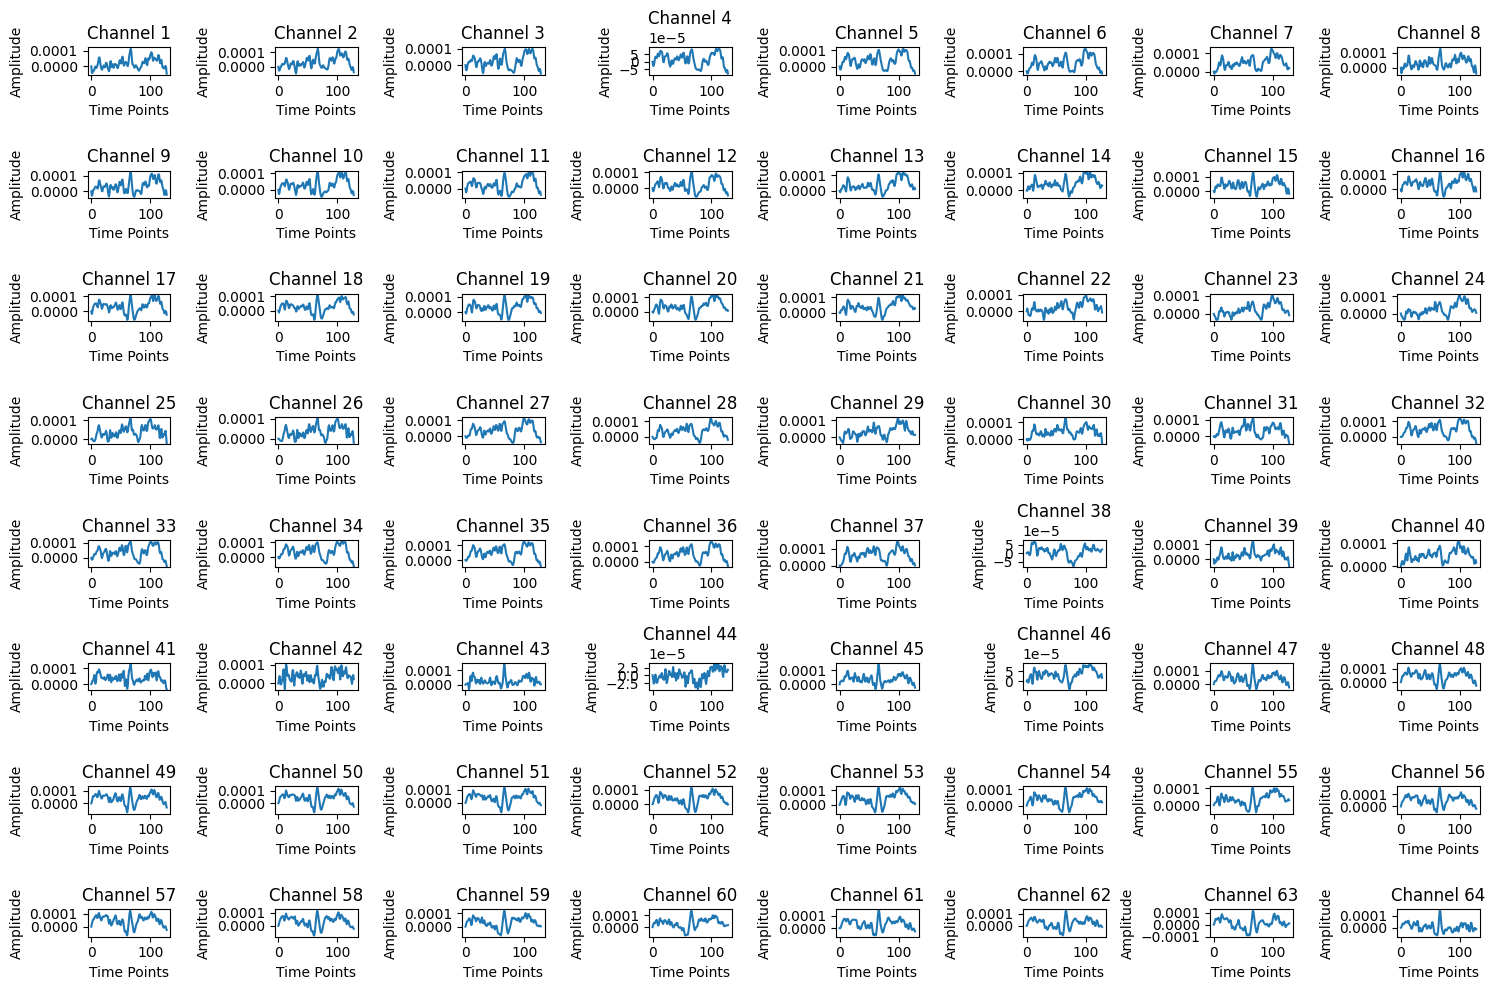

In [53]:
import matplotlib.pyplot as plt

# Plot the single epoch for all channels
plt.figure(figsize=(15, 10))
for i in range(epoch_data.shape[1]):  # Loop through each channel
    plt.subplot(8, 8, i + 1)  # Adjust subplot grid as needed
    plt.plot(epoch_data[0, i])  # Plot data for channel i
    plt.title(f'Channel {i + 1}')
    plt.xlabel('Time Points')
    plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


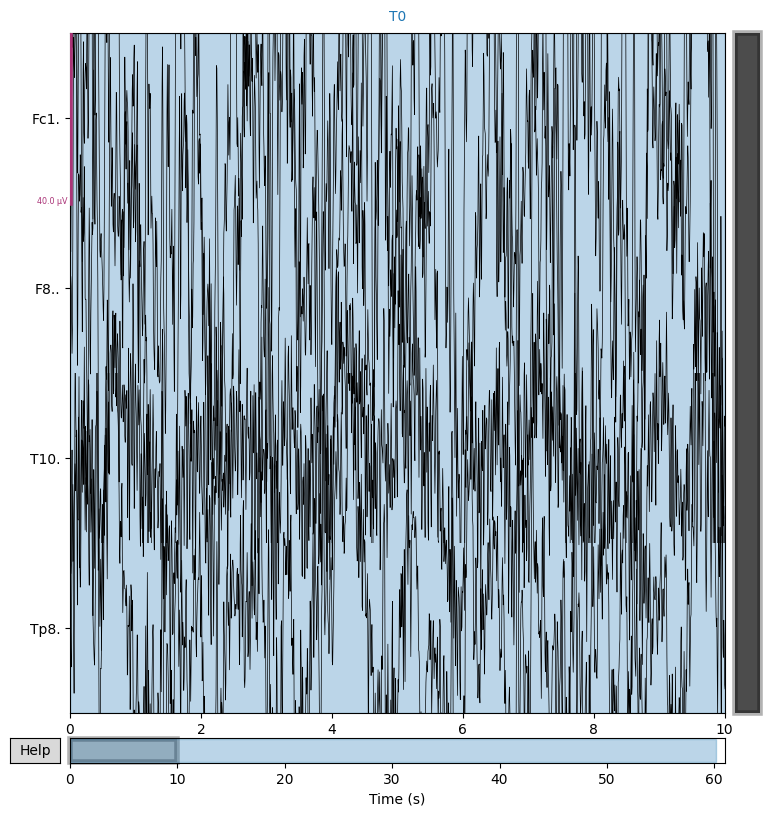

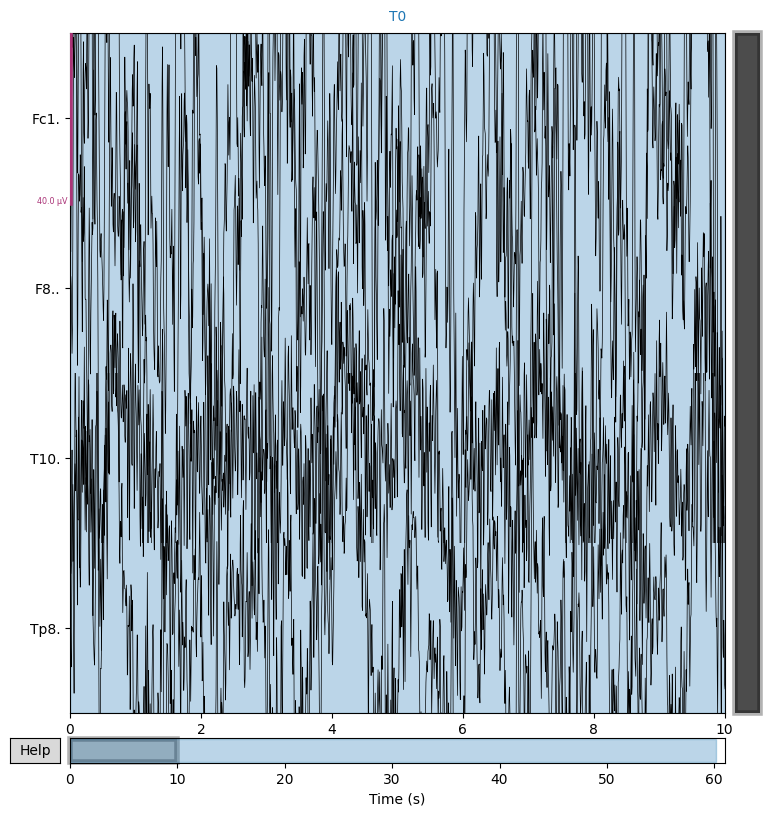

In [54]:
# Example to plot specific channels from the raw data
raw.plot(picks=[2, 37, 43, 45], start=0, duration=10)  # Adjust channel indices as needed


In [55]:
import numpy as np

# Extract data from the epoch
epoch_data = epochs.get_data()[0]  # Since you have only 1 epoch

# Calculate mean amplitude for each channel
mean_amplitude = np.mean(epoch_data, axis=1)
print("Mean Amplitude per Channel:", mean_amplitude)

# Calculate standard deviation for each channel
std_dev = np.std(epoch_data, axis=1)
print("Standard Deviation per Channel:", std_dev)

# Calculate kurtosis for each channel
from scipy.stats import kurtosis
kurt = kurtosis(epoch_data, axis=1)
print("Kurtosis per Channel:", kurt)


Mean Amplitude per Channel: [1.77730769e-05 3.19817582e-05 2.25601336e-05 1.70067976e-05
 3.70611205e-05 4.72217008e-05 4.81053012e-05 3.13094291e-05
 3.31077717e-05 2.80932129e-05 2.25252135e-05 2.05395176e-05
 3.89851815e-05 4.05196054e-05 4.14490656e-05 4.06499830e-05
 3.33428595e-05 2.90189704e-05 3.80074527e-05 3.80827699e-05
 4.08611707e-05 2.23636989e-05 2.28704248e-05 2.40463140e-05
 3.79767229e-05 3.47369423e-05 3.75816590e-05 3.66166546e-05
 3.30785628e-05 4.45830324e-05 3.46488510e-05 4.87511299e-05
 3.85227607e-05 3.71139526e-05 5.02250341e-05 5.21199005e-05
 6.45639033e-05 8.52170227e-06 2.93748525e-05 4.72947653e-05
 3.87657420e-05 3.79515515e-05 2.62778130e-05 1.49647647e-07
 3.58890939e-05 3.54158863e-05 4.24945718e-05 4.63453208e-05
 4.06091958e-05 4.20100005e-05 3.93794227e-05 3.84574654e-05
 4.28710450e-05 4.19526794e-05 3.51906134e-05 5.14223995e-05
 4.75143092e-05 3.40499345e-05 3.27042588e-05 3.42982170e-05
 3.46947438e-05 2.13031725e-05 1.08355281e-05 6.11189832e

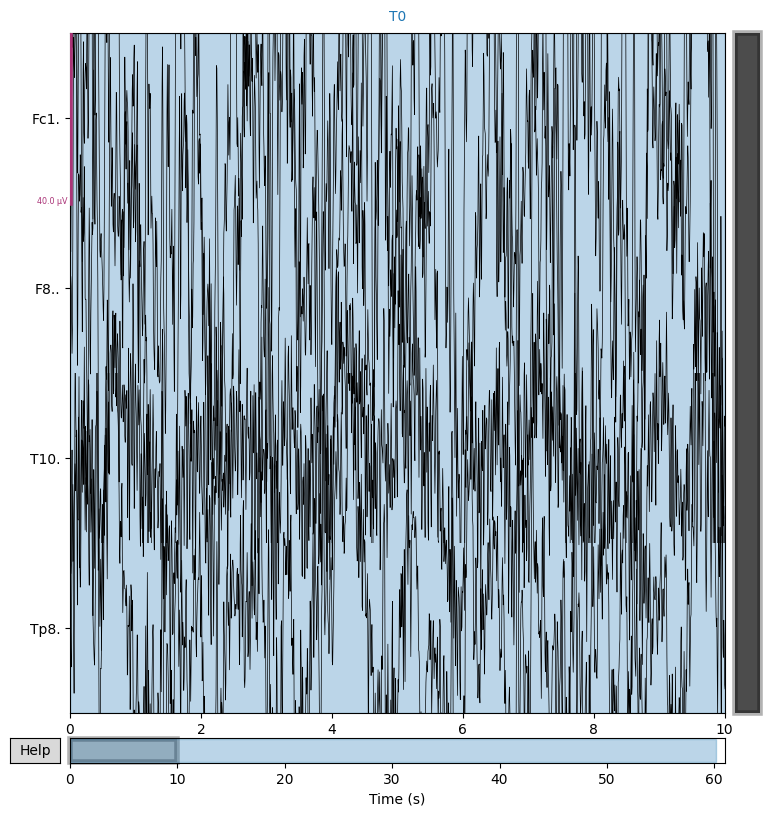

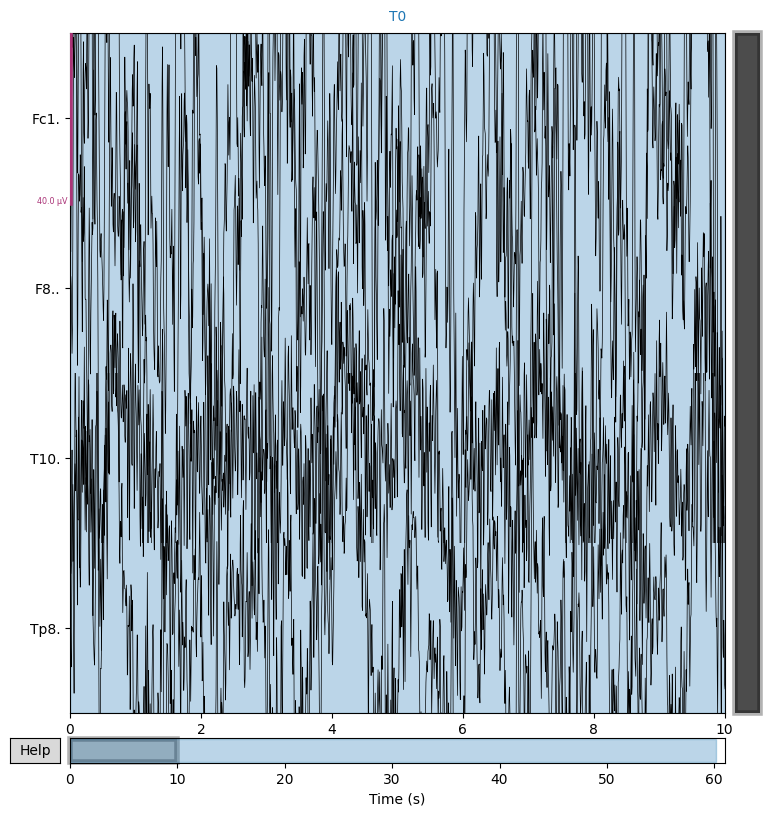

In [56]:
raw.plot(picks=[2, 37, 43, 45], start=0, duration=10)  # Adjust indices if necessary


In [57]:
print(raw.info['chs'][2])   # Channel 3 information
print(raw.info['chs'][37])  # Channel 38 information
print(raw.info['chs'][43])  # Channel 44 information
print(raw.info['chs'][45])  # Channel 46 information


{'cal': 1.0, 'logno': 3, 'scanno': 3, 'range': 1.0, 'unit_mul': 0 (FIFF_UNITM_NONE), 'ch_name': 'Fc1.', 'unit': 107 (FIFF_UNIT_V), 'coord_frame': 4 (FIFFV_COORD_HEAD), 'coil_type': 1 (FIFFV_COIL_EEG), 'kind': 2 (FIFFV_EEG_CH), 'loc': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])}
{'cal': 1.0, 'logno': 38, 'scanno': 38, 'range': 1.0, 'unit_mul': 0 (FIFF_UNITM_NONE), 'ch_name': 'F8..', 'unit': 107 (FIFF_UNIT_V), 'coord_frame': 4 (FIFFV_COORD_HEAD), 'coil_type': 1 (FIFFV_COIL_EEG), 'kind': 2 (FIFFV_EEG_CH), 'loc': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])}
{'cal': 1.0, 'logno': 44, 'scanno': 44, 'range': 1.0, 'unit_mul': 0 (FIFF_UNITM_NONE), 'ch_name': 'T10.', 'unit': 107 (FIFF_UNIT_V), 'coord_frame': 4 (FIFFV_COORD_HEAD), 'coil_type': 1 (FIFFV_COIL_EEG), 'kind': 2 (FIFFV_EEG_CH), 'loc': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])}
{'cal': 1.0, 'logno': 46, 'scanno': 46, 'range': 1.0, 'unit_mul': 0 (FIFF_UNITM_NONE), 

In [58]:
# Rescale the data for channels
channels_to_rescale = ['Fc1.', 'F8..', 'T10.', 'Tp8.']
scaling_factor = 1e6

for channel in channels_to_rescale:
    channel_index = raw.ch_names.index(channel)
    raw._data[channel_index] *= scaling_factor  # Correct the scaling


In [59]:
for channel in channels_to_rescale:
    channel_index = raw.ch_names.index(channel)
    raw.info['chs'][channel_index]['unit'] = 106  # 106 likely corresponds to microvolts


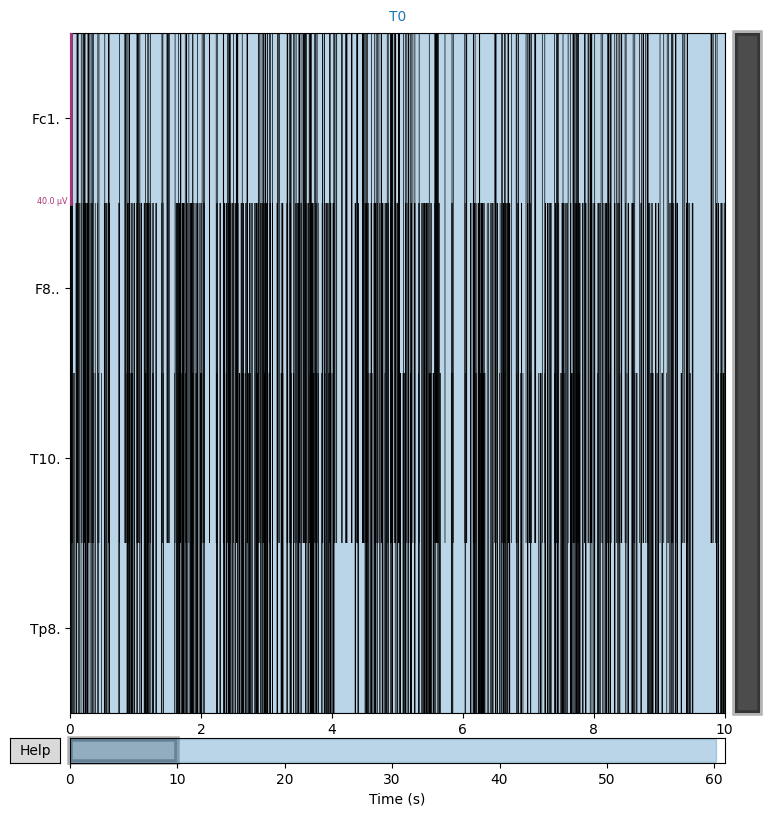

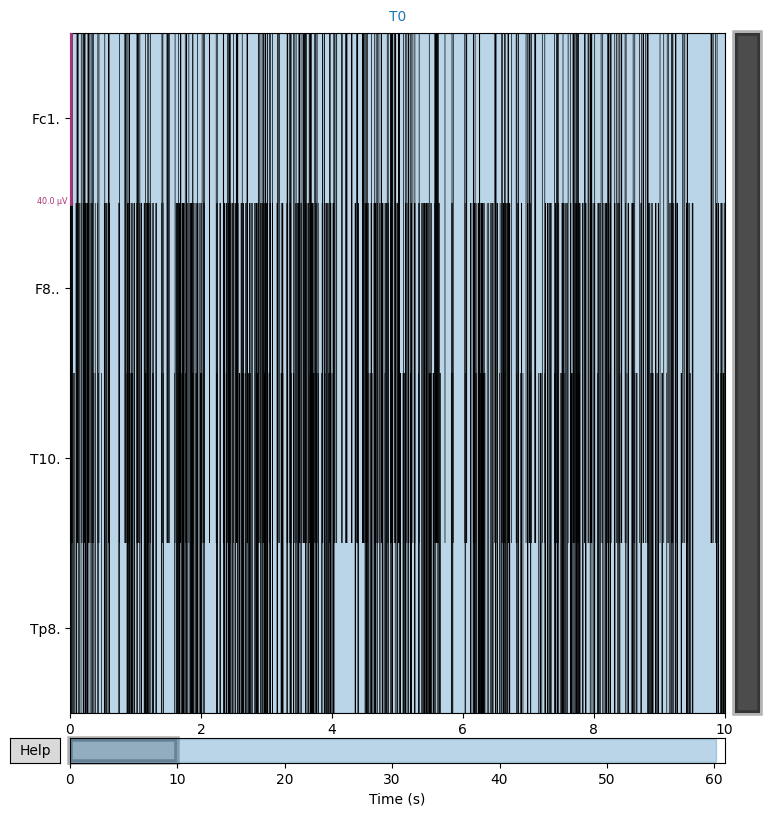

In [60]:
raw.plot(picks=[2, 37, 43, 45], start=0, duration=10)


Extracting EDF parameters from /content/drive/MyDrive/files/S001/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...


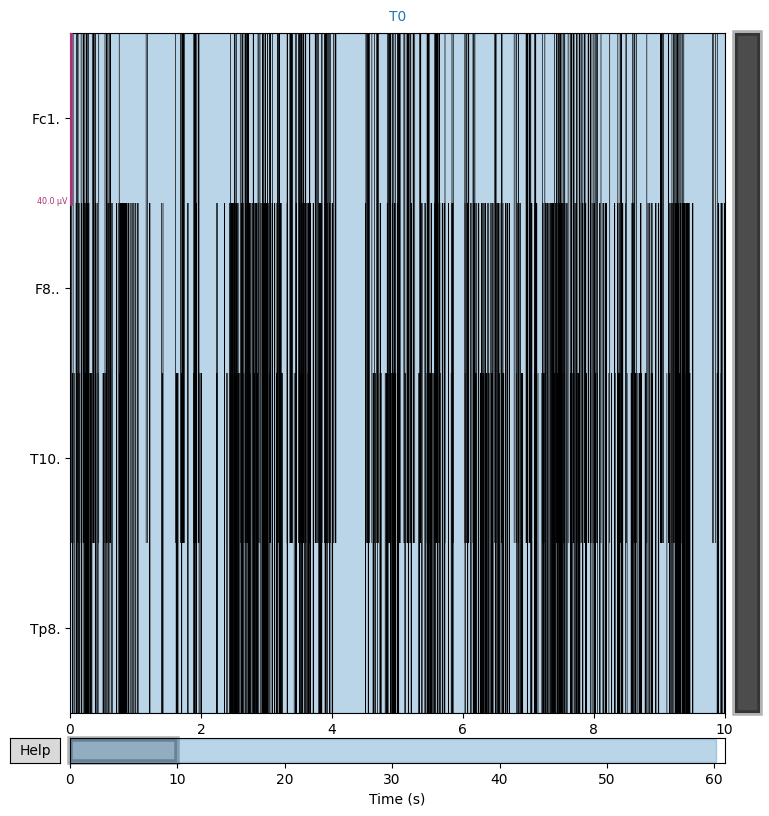

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1057 samples (6.606 s)

Used Annotations descriptions: ['T0']
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 129 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/usr/local/lib/python3.11/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 129, using nperseg = 129
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Band Power (delta): [2.1830426539477457e-10, 3.2266148330137417e-10, 427.2717473023616, 5.75659981151238e-10, 4.1496148740210105e-10, 2.8242405338623273e-10, 2.430604023875621e-10, 8.529496414965069e-11, 2.2509979129372668e-10, 2.9102299016808633e-10, 3.253508914312059e-10, 2.9642072703887894e-10, 3.9506707416484905e-10, 3.122144558795357e-10, 1.4062111703454662e-10, 3.4493114465851735e-10, 3.874589407193374e-10, 3.045828871303177e-10, 3.7508829493728425e-10, 5.074004926643851e-10, 5.094034767391101e-10, 3.2099788107475623e-10, 3.200566358082112e-10, 3.5131485544030216e-10, 2.7667700576274807e-10, 2.784121161636042e-10, 5.93183134009162e-10, 4.869953923118914e-10, 3.140208378031481e-10, 2.178840239212861e-10, 4.706307090197779e-10, 4.883373025496283e-10, 5.661768781554294e-10, 6.631574239912798e-10, 6.519537020098266e-10, 5.504237985878648e-10, 3.924262290608839e-10, 662.3797153951505, 1.6144312828881214e-10, 1.4336601170315222e-10, 5.887459091856175e-11, 1.6583147336371028e-10, 6.6939

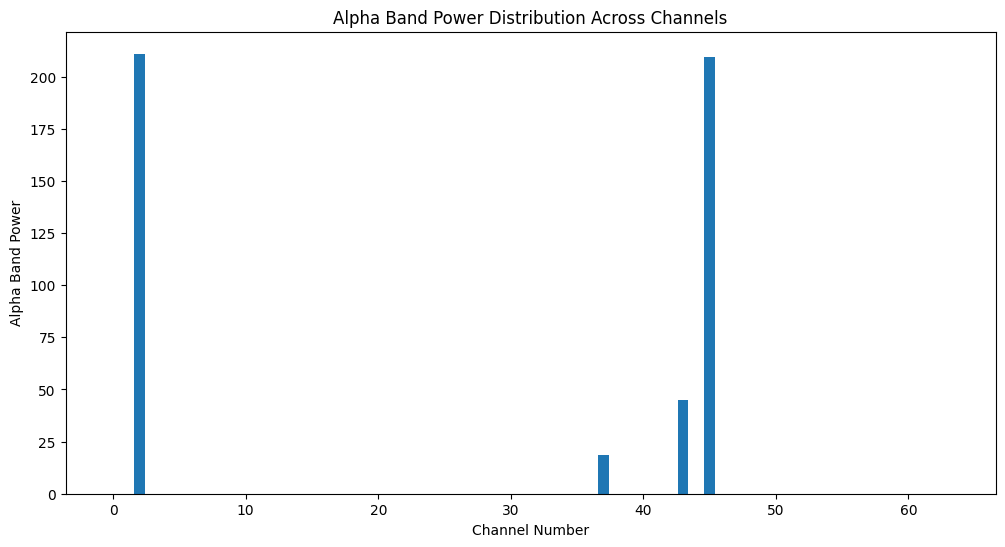

In [61]:
import mne
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt

# Load raw data
file_path = "/content/drive/MyDrive/files/S001/S001R01.edf"
raw = mne.io.read_raw_edf(file_path, preload=True)

# Identify channels to rescale
channels_to_rescale = ['Fc1.', 'F8..', 'T10.', 'Tp8.']
scaling_factor = 1e6

# Rescale data and update channel info
for channel in channels_to_rescale:
    channel_index = raw.ch_names.index(channel)
    raw._data[channel_index] *= scaling_factor
    raw.info['chs'][channel_index]['unit'] = 106  # Assuming 106 is microvolts

# Plot channels to confirm rescaling
raw.plot(picks=[raw.ch_names.index(c) for c in channels_to_rescale], start=0, duration=10)

# Apply bandpass filter (0.5 - 45 Hz)
raw.filter(0.5, 45, fir_design='firwin')

# Extract events from annotations
events, event_id = mne.events_from_annotations(raw)

# Create epochs with adjusted baseline interval
epochs = mne.Epochs(raw, events, event_id=event_id, tmin=0, tmax=0.8,
                    baseline=None, preload=True, reject=None)

# Extract epoch data
epoch_data = epochs.get_data()[0]  # Shape: (n_channels, n_times)

# Define frequency bands
bands = {
    "delta": (1, 4),
    "theta": (4, 8),
    "alpha": (8, 12),
    "beta": (12, 30),
}

# Sampling frequency
sf = raw.info['sfreq']

# Compute PSD and band power for each channel
band_power = {}
for band_name, (f_low, f_high) in bands.items():
    band_power[band_name] = []
    for i in range(epoch_data.shape[0]):  # Iterate through channels
        # Compute PSD using Welch's method
        freqs, psd = welch(epoch_data[i], sf, nperseg=256)  # Adjust nperseg as needed

        # Find the indices corresponding to the frequency band
        idx_band = (freqs >= f_low) & (freqs <= f_high)

        # Calculate band power
        power = np.sum(psd[idx_band])
        band_power[band_name].append(power)

# Print band power for each channel
for band_name, power_values in band_power.items():
    print(f"Band Power ({band_name}):", power_values)

# Visualize band power for a specific band (e.g., alpha)
alpha_power = band_power['alpha']
plt.figure(figsize=(12, 6))
plt.bar(range(len(alpha_power)), alpha_power)
plt.xlabel("Channel Number")
plt.ylabel("Alpha Band Power")
plt.title("Alpha Band Power Distribution Across Channels")
plt.show()


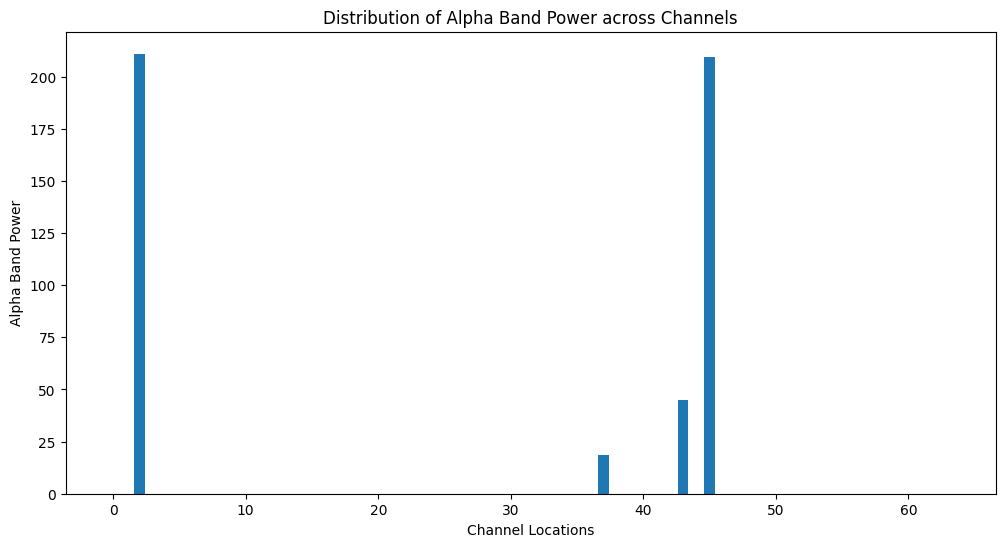

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Define channel locations (if available) - replace with actual channel locations
channel_locations = range(len(alpha_power))  # Replace with correct locations
# Let's say you want to visualize alpha band power
alpha_power = band_power['alpha']

# Plotting the band power distribution
plt.figure(figsize=(12, 6))
plt.bar(channel_locations, alpha_power)
plt.xlabel("Channel Locations")
plt.ylabel("Alpha Band Power")
plt.title("Distribution of Alpha Band Power across Channels")
plt.show()


In [63]:
print("Channel Names at Peaks:")
print(f"Channel at 3: {raw.ch_names[3]}")
print(f"Channel at 45: {raw.ch_names[45]}")
print(f"Channel at 42: {raw.ch_names[42]}")
print(f"Channel at 43: {raw.ch_names[43]}")


Channel Names at Peaks:
Channel at 3: Fcz.
Channel at 45: Tp8.
Channel at 42: T9..
Channel at 43: T10.


In [70]:
# utils/preprocess.py

import mne

def load_eeg(file_path):
    """
    Loads EEG data from an EDF file using MNE.
    """
    try:
        raw = mne.io.read_raw_edf(file_path, preload=True)
        return raw
    except Exception as e:
        print(f"Error loading EEG file: {e}")
        return None

if __name__ == '__main__':
    # Example usage (for testing)
    sample_file = 'sample.edf'
    eeg_data = load_eeg(sample_file)
    if eeg_data:
        print("EEG data loaded successfully.")
    else:
        print("Failed to load EEG data.")


Extracting EDF parameters from /content/sample.edf...
EDF file detected
Error loading EEG file: [Errno 2] No such file or directory: '/content/sample.edf'
Failed to load EEG data.


In [71]:
import streamlit as st
import utils.preprocess as preprocess
import io

def main():
    st.title("EEG Dream Visualizer")
    eeg_file = st.file_uploader("Upload EEG (.edf) file", type=["edf"])
    if eeg_file is not None:
        try:
            # Load the EEG data from the uploaded file
            raw = preprocess.load_eeg(eeg_file)

            if raw is not None:
                st.success("EEG file loaded successfully!")
                if st.button("Generate Dream Visualization"):
                    st.write("Generating dream visualization...")
                    # Add your visualization code here
                    st.write("Visualization generated!")
            else:
                st.error("Failed to load EEG data.")

        except Exception as e:
            st.error(f"An error occurred: {e}")

if __name__ == "__main__":
    main()


ModuleNotFoundError: No module named 'utils'

In [72]:
# utils/preprocess.py
import mne
import io

def load_eeg(eeg_file):
    """
    Loads EEG data from an uploaded file using MNE.
    """
    try:
        # Use io.BytesIO to handle the file-like object
        raw = mne.io.read_raw_edf(io.BytesIO(eeg_file.read()), preload=True, verbose=False)
        return raw
    except Exception as e:
        print(f"Error loading EEG file: {e}")
        return None


In [73]:
import streamlit as st
import utils.preprocess as preprocess
import io
import mne
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt

def main():
    st.title("EEG Dream Visualizer")
    eeg_file = st.file_uploader("Upload EEG (.edf) file", type=["edf"])

    if eeg_file is not None:
        try:
            raw = preprocess.load_eeg(eeg_file)
            if raw is not None:
                st.success("EEG file loaded successfully!")

                # Add a checkbox to choose whether to perform scaling
                perform_scaling = st.checkbox("Perform Channel Amplitude Scaling")

                if perform_scaling:
                    channels_to_rescale = ['Fc1.', 'F8..', 'T10.', 'Tp8.']
                    scaling_factor = 1e6
                    for channel in channels_to_rescale:
                        if channel in raw.ch_names:  # Check if channel exists
                            channel_index = raw.ch_names.index(channel)
                            raw._data[channel_index] *= scaling_factor
                            raw.info['chs'][channel_index]['unit'] = 106  # Assuming 106 is microvolts
                        else:
                            st.warning(f"Channel {channel} not found in EEG data.")

                    st.info("Channel amplitude scaling applied.")

                # Add a button to trigger the dream visualization
                if st.button("Generate Dream Visualization"):
                    st.write("Generating dream visualization...")

                    # Apply bandpass filter (0.5 - 45 Hz)
                    raw.filter(0.5, 45, fir_design='firwin', verbose=False)

                    # Extract events from annotations
                    events, event_id = mne.events_from_annotations(raw)

                    # Create epochs with adjusted baseline interval
                    epochs = mne.Epochs(raw, events, event_id=event_id, tmin=0, tmax=0.8,
                                        baseline=None, preload=True, reject=None, verbose=False)

                    # Extract epoch data
                    epoch_data = epochs.get_data()[0]  # Shape: (n_channels, n_times)

                    # Define frequency bands
                    bands = {
                        "delta": (1, 4),
                        "theta": (4, 8),
                        "alpha": (8, 12),
                        "beta": (12, 30),
                    }

                    # Sampling frequency
                    sf = raw.info['sfreq']

                    # Compute PSD and band power for each channel
                    band_power = {}
                    for band_name, (f_low, f_high) in bands.items():
                        band_power[band_name] = []
                        for i in range(epoch_data.shape[0]):  # Iterate through channels
                            # Compute PSD using Welch's method
                            freqs, psd = welch(epoch_data[i], sf, nperseg=256)  # Adjust nperseg as needed

                            # Find the indices corresponding to the frequency band
                            idx_band = (freqs >= f_low) & (freqs <= f_high)

                            # Calculate band power
                            power = np.sum(psd[idx_band])
                            band_power[band_name].append(power)

                    # Print band power for each channel
                    for band_name, power_values in band_power.items():
                        print(f"Band Power ({band_name}):", power_values)

                    # Visualize band power for a specific band (e.g., alpha)
                    alpha_power = band_power['alpha']
                    plt.figure(figsize=(12, 6))
                    plt.bar(range(len(alpha_power)), alpha_power)
                    plt.xlabel("Channel Number")
                    plt.ylabel("Alpha Band Power")
                    plt.title("Alpha Band Power Distribution Across Channels")
                    st.pyplot(plt)

                    st.write("Visualization generated!")
            else:
                st.error("Failed to load EEG data.")
        except Exception as e:
            st.error(f"An error occurred: {e}")

if __name__ == "__main__":
    main()


ModuleNotFoundError: No module named 'utils'

In [74]:
import os
import shutil

# Define the current and destination paths
current_path = os.path.join("dream_visualizer", "app.py")
destination_path = "app.py"

# Check if the current path exists
if os.path.exists(current_path):
    try:
        # Move the file
        shutil.move(current_path, destination_path)
        print(f"Moved 'app.py' to the parent directory.")
    except Exception as e:
        print(f"Error moving 'app.py': {e}")
else:
    print(f"'app.py' not found in the 'dream_visualizer' directory.")


Moved 'app.py' to the parent directory.


In [75]:
import utils.preprocess as preprocess


ModuleNotFoundError: No module named 'utils'

In [76]:
import os
import shutil

# Define the current and destination paths
current_path = os.path.join("dream_visualizer", "app.py")
destination_path = "app.py"

# Check if the current path exists
if os.path.exists(current_path):
    try:
        # Move the file
        shutil.move(current_path, destination_path)
        print(f"Moved 'app.py' to the parent directory.")
    except Exception as e:
        print(f"Error moving 'app.py': {e}")
else:
    print(f"'app.py' not found in the 'dream_visualizer' directory.")


'app.py' not found in the 'dream_visualizer' directory.


In [77]:
import os
print(os.getcwd())


/content


In [78]:
import os

# List all directories in /content
print(os.listdir('/content'))


['.config', 'requirements.txt', 'app.py', 'drive', 'EEG_web_app', '=2.16', '=1.18.1', 'dream_visualizer', '=5.18', 'sample_data']


In [81]:
!npm install -g localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏
changed 22 packages in 1s
⠏
⠏3 packages are looking for funding
⠏  run `npm fund` for details
⠏

In [82]:
!npx localtunnel --port 8502


⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋your url is: https://happy-weeks-sin.loca.lt
^C


In [83]:
!pip install pyngrok


In [84]:
from pyngrok import ngrok
public_url = ngrok.connect(port=8502)
print(f"Public URL: {public_url}")


PyngrokNgrokHTTPError: ngrok client exception, API returned 400: {"error_code":102,"status_code":400,"msg":"invalid tunnel configuration","details":{"err":"yaml: unmarshal errors:\n  line 1: field port not found in type config.HTTPv2Tunnel"}}


In [79]:
!streamlit run /content/app.py





  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8502
  External URL: http://35.245.61.73:8502



  Stopping...


In [85]:
!streamlit run /content/app.py --server.port 8502





  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8502
  External URL: http://35.245.61.73:8502

  Stopping...
  Stopping...


In [86]:
from pyngrok import ngrok

# Specify the port where Streamlit is running (default is 8502)
public_url = ngrok.connect(8502)
print(f"Public URL: {public_url}")


Public URL: NgrokTunnel: "https://53eb-35-245-61-73.ngrok-free.app" -> "http://localhost:8502"


In [87]:
!curl http://localhost:8502


curl: (7) Failed to connect to localhost port 8502 after 0 ms: Connection refused


In [88]:
from pyngrok import ngrok

# Connect Ngrok to port 8502
public_url = ngrok.connect(8502)
print(f"Public URL: {public_url}")


Public URL: NgrokTunnel: "https://d667-35-245-61-73.ngrok-free.app" -> "http://localhost:8502"


In [91]:
!streamlit run /content/app.py --server.port 8502
!curl http://localhost:8502




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8502
  External URL: http://35.245.61.73:8502

  Stopping...
  Stopping...
curl: (7) Failed to connect to localhost port 8502 after 0 ms: Connection refused


In [92]:
!pip install pyngrok


In [93]:
from pyngrok import ngrok

# Connect ngrok to the Streamlit port (8502)
public_url = ngrok.connect(8502)
print(f"Public URL: {public_url}")


Public URL: NgrokTunnel: "https://5680-35-245-61-73.ngrok-free.app" -> "http://localhost:8502"


In [94]:
!npm install -g localtunnel


⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙
changed 22 packages in 3s
⠙
⠙3 packages are looking for funding
⠙  run `npm fund` for details
⠙

In [97]:
!lt --port 8502


your url is: https://chilly-plums-pay.loca.lt
^C


In [96]:
!curl https://loca.lt/mytunnelpassword


35.245.61.73

In [98]:
!pip install streamlit --quiet
!pip install pyngrok --quiet


In [99]:
from pyngrok import ngrok

# Replace YOUR_AUTH_TOKEN with your ngrok authtoken
!ngrok authtoken 2uh2VQGd3grqPhTcnW5O4LYazg2_7fMBSvheZdnkAqCSh5JE2


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [100]:
# Install required libraries
!pip install streamlit --quiet
!pip install pyngrok --quiet

# Authenticate ngrok (already done)
# !ngrok authtoken YOUR_AUTH_TOKEN  # Uncomment if not done yet

# Run Streamlit app in the background
!streamlit run /content/app.py --server.port 8502 &

# Create an ngrok tunnel for port 8502
from pyngrok import ngrok
public_url = ngrok.connect(8502)
print(f"Public URL: {public_url}")





  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8502
  External URL: http://35.245.61.73:8502


  A new version of Streamlit is available.

  See what's new at https://discuss.streamlit.io/c/announcements

  Enter the following command to upgrade:
  $ pip install streamlit --upgrade

  Stopping...
Public URL: NgrokTunnel: "https://78dd-35-245-61-73.ngrok-free.app" -> "http://localhost:8502"


In [101]:
!pip install streamlit --upgrade


$ pip install streamlit --upgrade
$ pip install streamlit --upgrade
pip install streamlit --upgrade
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 35.1 MB/s eta 0:00:00
  Attempting uninstall: streamlit
    Found existing installation: streamlit 1.31.0
    Uninstalling streamlit-1.31.0:
      Successfully uninstalled streamlit-1.31.0


In [1]:
import os
os.environ["STREAMLIT_BROWSER_GATHER_USAGE_STATS"] = "false"


In [2]:
!pip install pyngrok --quiet


In [3]:
from pyngrok import ngrok

public_url = ngrok.connect(8502)
print(f"Public URL: {public_url}")


Public URL: NgrokTunnel: "https://e613-35-245-61-73.ngrok-free.app" -> "http://localhost:8502"


In [4]:
import os

# Check if app.py exists in the current directory
file_path = "/content/app.py"  # Adjust this path if your app.py is located elsewhere
if os.path.exists(file_path):
    print("'app.py' exists.")
else:
    print("'app.py' does not exist.")


'app.py' exists.


In [5]:
pip freeze > requirements.txt
